In [17]:
import pandas as pd 
import numpy as np  

In [18]:
train_df=pd.read_csv("churn-bigml-80.csv")
test_df=pd.read_csv("churn-bigml-20.csv")

In [19]:
train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [20]:
train_df=train_df.drop(columns=["State","Area code"])
test_df=test_df.drop(columns=["State","Area code"])

In [21]:
train_df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [22]:
from sklearn.preprocessing import LabelEncoder 

In [23]:
le=LabelEncoder()
cols="International plan","Voice mail plan","Churn"
train_df["International plan"]=le.fit_transform(train_df["International plan" ])
train_df["Voice mail plan"]=le.fit_transform(train_df["Voice mail plan" ])
train_df["Churn"]=le.fit_transform(train_df["Churn" ])

test_df["International plan"]=le.fit_transform(test_df["International plan" ])
test_df["Voice mail plan"]=le.fit_transform(test_df["Voice mail plan" ])
test_df["Churn"]=le.fit_transform(test_df["Churn" ])

In [24]:
train_df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train=train_df.drop(columns="Churn")
y_train=train_df["Churn"]
x_test=train_df.drop(columns="Churn")
y_test=train_df["Churn"]

In [27]:
from sklearn.tree import DecisionTreeClassifier 

In [28]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
y_pred=dtc.predict(x_test)

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [38]:
print("accuracy_score",accuracy_score(y_test,y_pred))

accuracy_score 1.0


In [39]:
print("f1 score",f1_score(y_test,y_pred))

f1 score 1.0


In [40]:
print("classification report",classification_report(y_test,y_pred))

classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2278
           1       1.00      1.00      1.00       388

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666



In [47]:
from sklearn import tree
print(tree.export_text(dtc,feature_names=list(x_train.columns)))

|--- Total day charge <= 44.95
|   |--- Customer service calls <= 3.50
|   |   |--- International plan <= 0.50
|   |   |   |--- Total day charge <= 37.95
|   |   |   |   |--- Account length <= 224.50
|   |   |   |   |   |--- Total eve charge <= 29.27
|   |   |   |   |   |   |--- Total eve charge <= 14.34
|   |   |   |   |   |   |   |--- Total day calls <= 73.50
|   |   |   |   |   |   |   |   |--- Account length <= 26.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Account length >  26.50
|   |   |   |   |   |   |   |   |   |--- Total night charge <= 6.50
|   |   |   |   |   |   |   |   |   |   |--- Total intl charge <= 2.90
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- Total intl charge >  2.90
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Total night charge >  6.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   

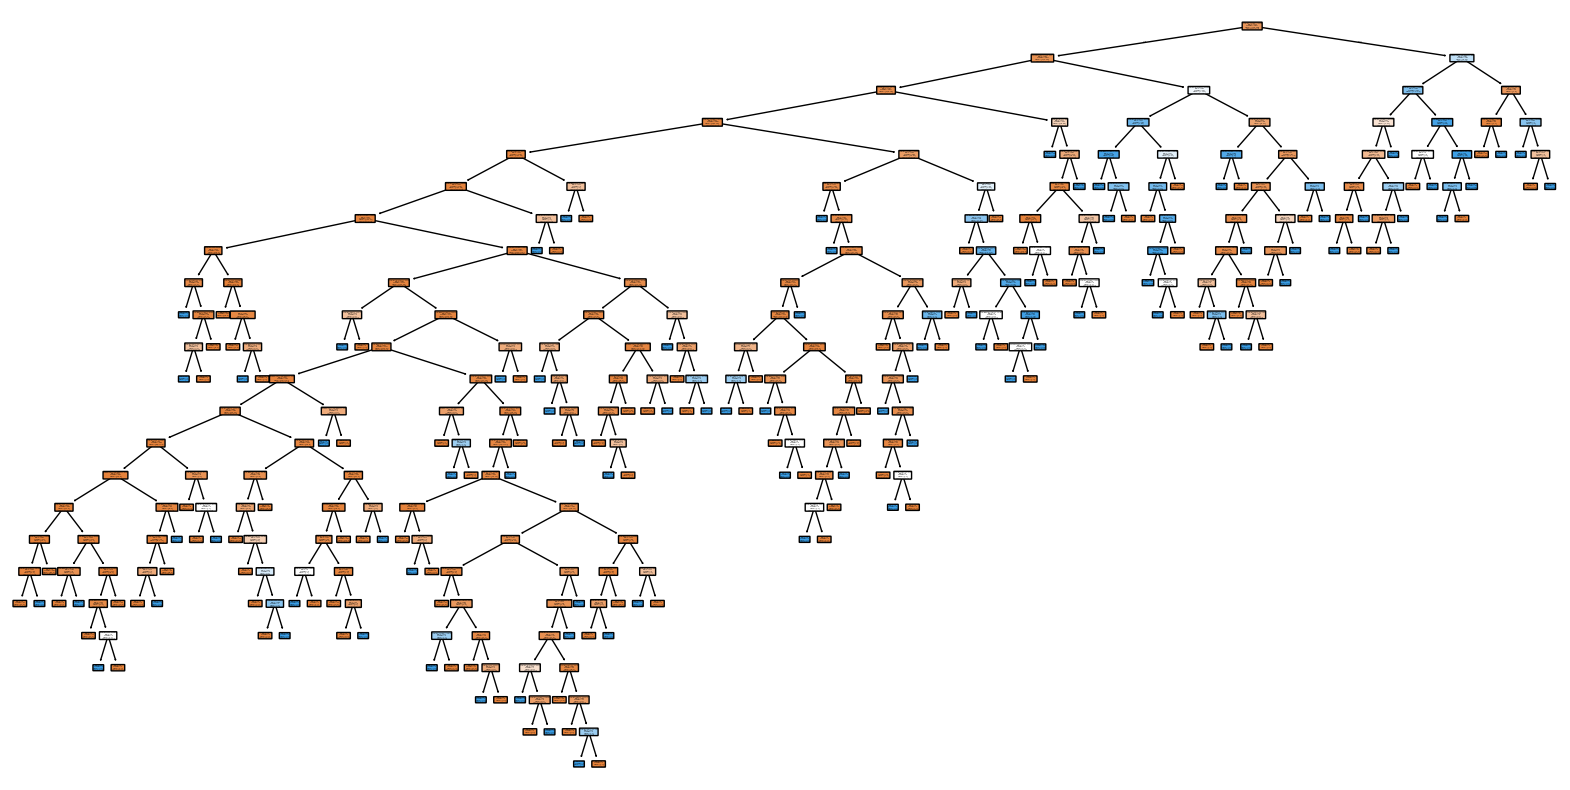

In [49]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=x_train.columns, class_names=['Not Churn', 'Churn'], filled=True, rounded=True)
plt.show()

In [50]:
dtc_tuned=DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=4,
    random_state=42
)
dtc_tuned.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=42)

In [52]:
y_pred_tuned=dtc_tuned.predict(x_test)


In [54]:
print("accuracy_score",accuracy_score(y_test,y_pred_tuned))

accuracy_score 0.9024756189047262


In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

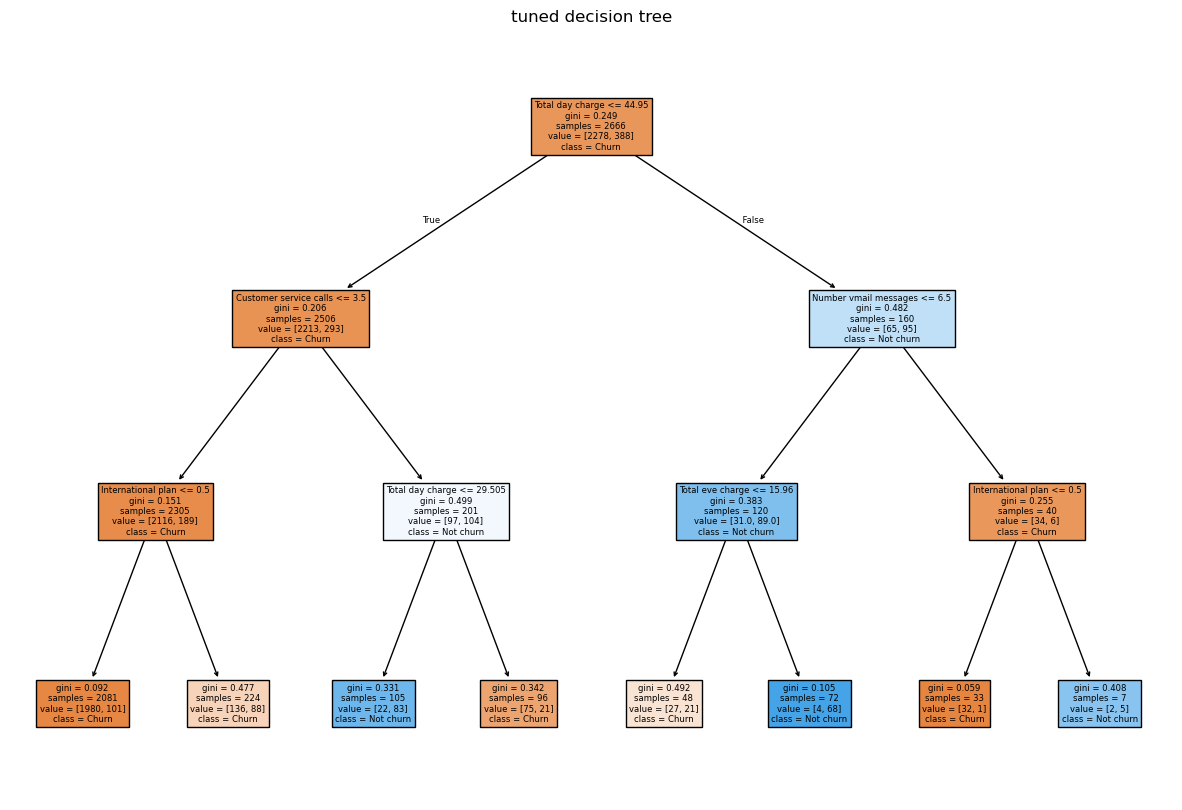

In [58]:
plt.figure(figsize=(15,10))
plot_tree(
    dtc_tuned,
    feature_names=x_train.columns,
    class_names=["Churn","Not churn"],
    filled=True
    )
plt.title("tuned decision tree")
plt.show()